# Dimensionality Reduction

In this exercise, we will learn several dimensionality reduction methods using the Penguin dataset.

## Preprocessing


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

# Load the penguins dataset
data_table = sns.load_dataset("penguins")
data_table.head()

# Impute the missing values
for column in data_table.columns:
    data_table[column] = data_table[column].fillna(
        data_table[column].dropna().mode()[0]
    )

categorical_cols = ["island", "sex"]
prep_data_table = pd.get_dummies(data_table, columns=categorical_cols, drop_first=True)

X = prep_data_table.drop(columns=["species"]).values.astype(float)
y = prep_data_table["species"].values
feature_cols = prep_data_table.drop(columns=["species"]).columns

X = X.astype(float)
ylabel, yids = np.unique(y, return_inverse=True)

# Linear Discriminant Analysis

In LDA, we will 
1) Compute the within-class and between-class scatter matrices
2) Compute the generalized eigenvalue problem to generate the eigenvectors. 
3) Project the data to 2D by using the eigenvectors. 


In [15]:
from scipy import sparse

ylab = np.unique(y)
Sw = np.zeros((X.shape[1], X.shape[1]))  # Within class covariance
Sb = np.zeros((X.shape[1], X.shape[1]))  # Between class covariance

# TODO: Compute the within-class scatter matrix
# Hint
# - Sume of covariances over all classes
# - np.cov is useful to compute the covariance of each class
ylab = np.unique(y)
Sw = np.zeros((X.shape[1], X.shape[1]))
for yc in ylab:
    Xclass = X[y == yc]
    Sw += np.cov(Xclass.T)

# TODO: Compute the between-class scatter matrix
# Hint:
#  1. Compute the center of the data, m
#  2. Compute the center of individual classes, mc.
#  3. Compute the variance of mc over all classes with m as the center, namely \sum (mc - m)(mc - m)^T
mu = X.mean(axis=0)
for i, yc in enumerate(ylab):
    mc = X[y == yc].mean(axis=0)
    Sb += np.outer((mc - mu), (mc - mu).T)


# TODO: Compute the generalized eigenvalue problem
w, v = sparse.linalg.eigs(Sb, M=Sw, k=2, which="LM")


# TODO: Project the data
#Xproj = X @ v

array([[ 9.19527620e-03+0.j, -2.22541588e-01+0.j],
       [-5.25688880e-01+0.j,  8.96212164e-02+0.j],
       [ 4.55113663e-02+0.j, -8.64878128e-03+0.j],
       [ 7.61282709e-04+0.j,  4.11521933e-04+0.j],
       [-1.09174128e+00+0.j, -9.89447358e-01+0.j],
       [-8.02871324e-01+0.j,  2.10081020e-02+0.j],
       [ 2.81007897e-03+0.j,  5.09734441e-01+0.j]])

/home/vscode/venv/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vscode/venv/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vscode/venv/lib/python3.9/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/home/vscode/venv/lib/python3.9/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


Text(0, 0.5, 'LDA 2')

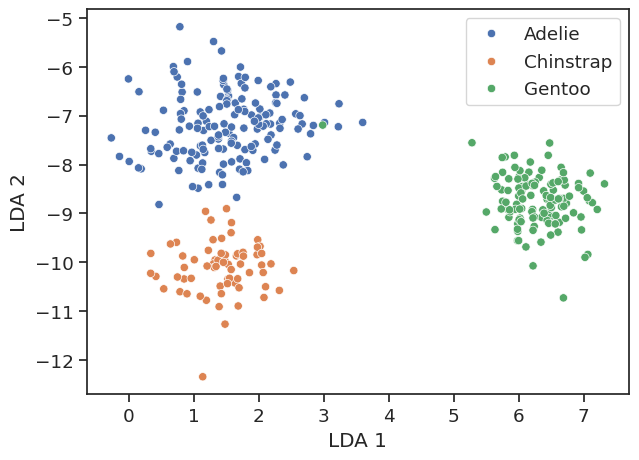

In [3]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("LDA 1")
ax.set_ylabel("LDA 2")